In [1]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt  

In [63]:
df=pd.read_excel('C:\\Users\\MYC\\Downloads\\data.xlsx')
date_parser=lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')
#df.set_index("Jour", inplace = True)

In [64]:
df.head()

Jour  Cas testés négatifs  Cas testés positifs  Rétablis  Morts  \
0 2020-02-07                    9                    0         0      0   
1 2020-02-15                    1                    0         0      0   
2 2020-02-26                    7                    0         0      0   
3 2020-03-02                   11                    1         0      0   
4 2020-03-03                    4                    0         0      0   

   Cas testés  % Patients  Cumul testes  Cumul Patients  
0           9    0.000000             9               0  
1           1    0.000000            10               0  
2           7    0.000000            17               0  
3          12    0.083333            29               1  
4           4    0.000000            33               1

In [221]:
import pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(idata, title='Prediction of coronavirus', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

C:\Users\MYC\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Cas testés Positifs

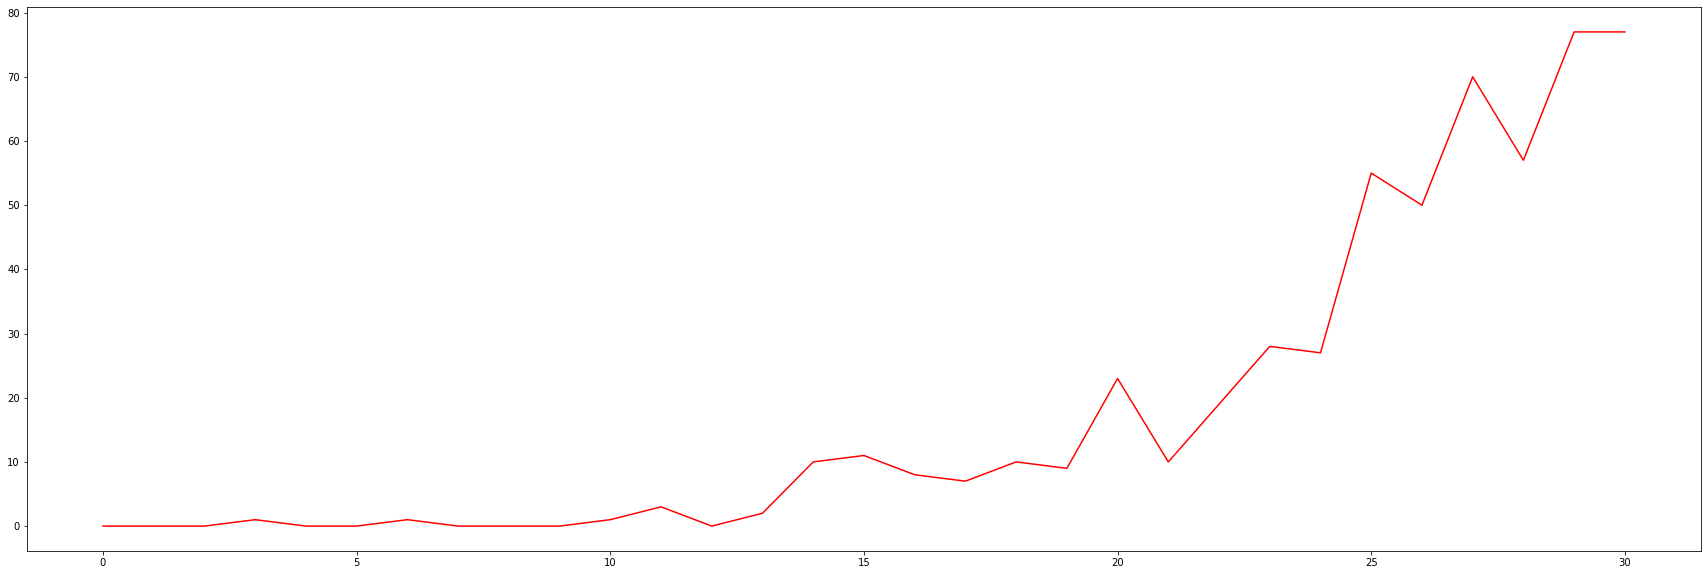

In [4]:
df['Cas testés positifs'].plot(style=['r-'], figsize=(30, 10))

In [5]:
idata=df[['Jour','Cas testés positifs','Rétablis','Morts']]
idata.rename(columns={'Jour':'Date','Cas testés positifs':'Confirmed','Rétablis':'Recovered','Morts': 'Deaths'}, inplace=True)
idata['Confirmed'] = pd.to_numeric(idata['Confirmed'], errors='coerce')
idata['Recovered'] = pd.to_numeric(idata['Recovered'] , errors='coerce')
idata['Deaths'] = pd.to_numeric(idata['Deaths'], errors='coerce')

C:\Users\MYC\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\MYC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MYC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

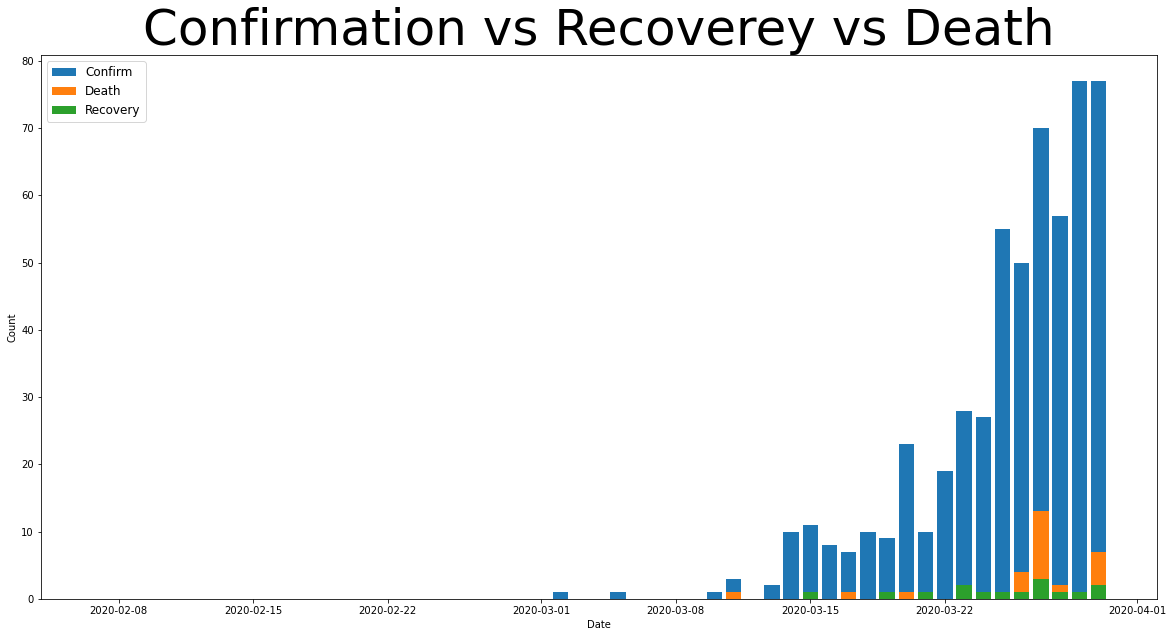

In [6]:
plt.figure(figsize=(20,10))
plt.bar(idata.Date, idata.Confirmed,label="Confirm")
plt.bar(idata.Date, idata.Deaths,label="Death")
plt.bar(idata.Date, idata.Recovered,label="Recovery")

plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title("Confirmation vs Recoverey vs Death",fontsize=50)
plt.show()


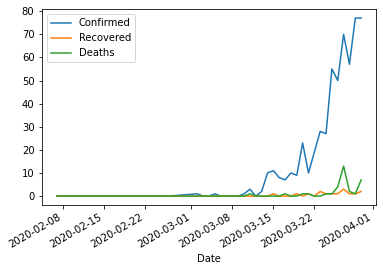

In [7]:
idata.set_index("Date", inplace = True)
idata.plot()

## Prophet Algorithm
What is Prophet?
Prophet is a facebooks’ open source time series prediction. Prophet decomposes time series into trend, seasonality and holiday. It has intuitive hyper parameters which are easy to tune.

### Prédiction des cas testés positifs

In [8]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [9]:
pr_data_test = df.loc[:,['Jour','Cas testés positifs']]
pr_data_test.columns = ['ds','y']
pr_data_test.head()

ds  y
0 2020-02-07  0
1 2020-02-15  0
2 2020-02-26  0
3 2020-03-02  1
4 2020-03-03  0

In [10]:
m = Prophet()
m.fit(pr_data_test)
future=m.make_future_dataframe(periods=15)
forecast_test=m.predict(future)
forecast_test


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2020-02-07 -35.144298  -47.009144   -6.636161   -35.144298   -35.144298   
1  2020-02-15 -23.195734  -42.210114   -2.736029   -23.195734   -23.195734   
2  2020-02-26  -6.766459  -28.479715   13.486115    -6.766459    -6.766459   
3  2020-03-02   0.701394  -18.576867   21.836152     0.701394     0.701394   
4  2020-03-03   2.194964  -26.665484   12.973082     2.194964     2.194964   
5  2020-03-04   3.688535  -16.573785   23.279244     3.688535     3.688535   
6  2020-03-05   5.182105  -20.943045   20.117206     5.182105     5.182105   
7  2020-03-06   6.675676   -6.203376   35.350495     6.675676     6.675676   
8  2020-03-07   8.169246  -11.769612   30.613416     8.169246     8.169246   
9  2020-03-09  11.156387   -8.174314   32.532409    11.156387    11.156387   
10 2020-03-10  12.649958  -16.395153   24.755691    12.649958    12.649958   
11 2020-03-11  14.143528   -7.970219   34.685295    14.143528    14.143528   
12 2020-03-12  15.637099  -10.793412   28.550759    15.637099    15.637099   
13 2020-03-13  17.130669    4.671649   46.321275    17.130669    17.130669   
14 2020-03-14  18.624240    0.575484   39.790908    18.624240    18.624240   
15 2020-03-15  20.117810    5.665302   46.046377    20.117810    20.117810   
16 2020-03-16  21.611381    1.976421   43.504316    21.611381    21.611381   
17 2020-03-17  23.104951   -7.745201   33.771961    23.104951    23.104951   
18 2020-03-18  24.598522    3.792850   43.875200    24.598522    24.598522   
19 2020-03-19  26.092092   -0.384740   41.343603    26.092092    26.092092   
20 2020-03-20  27.585663   14.238174   56.659161    27.585663    27.585663   
21 2020-03-21  29.079233    9.547420   50.403788    29.079233    29.079233   
22 2020-03-22  30.572804   15.872640   58.376422    30.572804    30.572804   
23 2020-03-23  32.066374   13.293059   53.742466    32.066374    32.066374   
24 2020-03-24  33.559945    2.729378   42.651264    33.559945    33.559945   
25 2020-03-25  35.053515   14.769094   54.506574    35.053515    35.053515   
26 2020-03-26  36.547086   10.104725   50.315877    36.547086    36.547086   
27 2020-03-27  38.040656   25.613749   67.698688    38.040656    38.040656   
28 2020-03-28  39.534227   20.794792   60.896492    39.534227    39.534227   
29 2020-03-29  41.027797   24.688964   66.122011    41.027797    41.027797   
30 2020-03-30  42.521368   22.845169   65.542275    42.521368    42.521368   
31 2020-03-31  44.014938   14.714580   56.421538    44.014938    44.014938   
32 2020-04-01  45.508509   23.188883   64.124171    45.508509    45.508509   
33 2020-04-02  47.002079   20.412505   61.022904    47.002079    47.002079   
34 2020-04-03  48.495650   35.959517   76.702533    48.495650    48.495650   
35 2020-04-04  49.989220   29.915406   71.094573    49.989220    49.989220   
36 2020-04-05  51.482791   36.345048   76.315645    51.482790    51.482791   
37 2020-04-06  52.976361   33.253582   75.048270    52.976361    52.976361   
38 2020-04-07  54.469932   25.104659   67.180661    54.469931    54.469932   
39 2020-04-08  55.963502   33.940278   74.306049    55.963502    55.963502   
40 2020-04-09  57.457073   30.250214   71.641911    57.457072    57.457073   
41 2020-04-10  58.950643   46.245524   85.624509    58.950643    58.950643   
42 2020-04-11  60.444214   40.893428   81.944316    60.444213    60.444214   
43 2020-04-12  61.937784   44.801327   87.503142    61.937784    61.937785   
44 2020-04-13  63.431355   43.370750   84.357632    63.431354    63.431355   
45 2020-04-14  64.924925   33.852707   75.438963    64.924925    64.924926   

    additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0         8.162203              8.162203              8.162203  8.162203   
1         0.981412              0.981412              0.981412  0.981412   
2        -0.517217             -0.517217             -0.517217 -0.517217   
3         1.209837              1.209837

In [11]:
test = forecast_test.loc[:,['ds','trend']]
test = test[test['trend']>0]
test.head()
test=test.tail(15)
test.columns = ['Date','Cas positif']
test.head()

Date  Cas positif
31 2020-03-31    44.014938
32 2020-04-01    45.508509
33 2020-04-02    47.002079
34 2020-04-03    48.495650
35 2020-04-04    49.989220

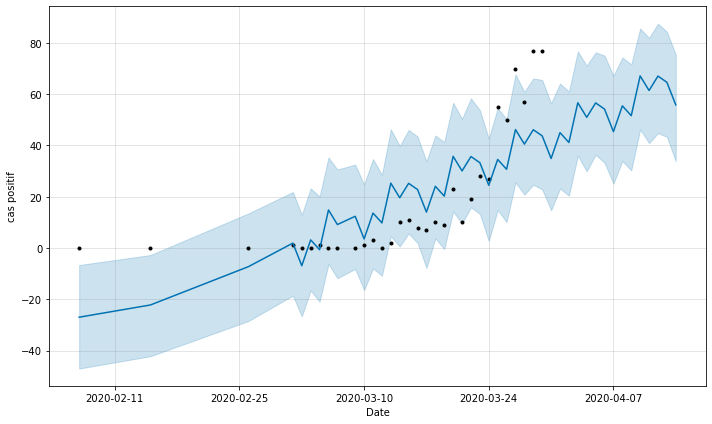

In [12]:
import plotly.offline as py

fig_test = plot_plotly(m, forecast_test)
py.iplot(fig_test) 

fig_test = m.plot(forecast_test,xlabel='Date',ylabel='cas positif')

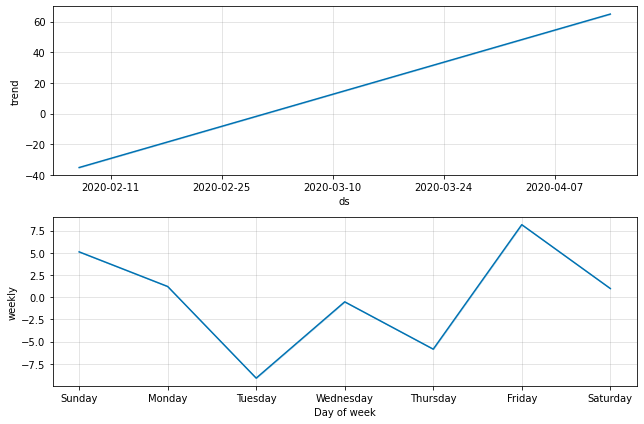

In [13]:
figure=m.plot_components(forecast_test)


### Prédiction des morts

In [14]:
pr_data_cm = df.loc[:,['Jour','Morts']]
pr_data_cm.columns = ['ds','y']
pr_data_cm.head()

ds  y
0 2020-02-07  0
1 2020-02-15  0
2 2020-02-26  0
3 2020-03-02  0
4 2020-03-03  0

In [15]:
m=Prophet()
m.fit(pr_data_cm)
future=m.make_future_dataframe(periods=15)
forecast_cm=m.predict(future)
forecast_cm

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2020-02-07 -3.147110   -3.273424    1.997921    -3.147110    -3.147110   
1  2020-02-15 -2.224406   -4.940236    0.568170    -2.224406    -2.224406   
2  2020-02-26 -0.955781   -3.863041    1.434323    -0.955781    -0.955781   
3  2020-03-02 -0.379134   -2.932918    2.471580    -0.379134    -0.379134   
4  2020-03-03 -0.263804   -3.218976    2.230774    -0.263804    -0.263804   
5  2020-03-04 -0.148474   -2.879263    2.175967    -0.148474    -0.148474   
6  2020-03-05 -0.033145   -2.970994    2.413216    -0.033145    -0.033145   
7  2020-03-06  0.082185   -0.047712    5.389397     0.082185     0.082185   
8  2020-03-07  0.197514   -2.439320    2.808285     0.197514     0.197514   
9  2020-03-09  0.428173   -2.126158    3.313954     0.428173     0.428173   
10 2020-03-10  0.543503   -2.713270    2.861242     0.543503     0.543503   
11 2020-03-11  0.658832   -2.218950    3.046379     0.658832     0.658832   
12 2020-03-12  0.774162   -2.083361    3.232078     0.774162     0.774162   
13 2020-03-13  0.889491    0.535815    6.192033     0.889491     0.889491   
14 2020-03-14  1.004821   -1.540056    3.534232     1.004821     1.004821   
15 2020-03-15  1.120150   -3.306442    1.948190     1.120150     1.120150   
16 2020-03-16  1.235480   -1.308100    3.948934     1.235480     1.235480   
17 2020-03-17  1.350809   -1.598583    3.460147     1.350809     1.350809   
18 2020-03-18  1.466139   -1.450612    3.767862     1.466139     1.466139   
19 2020-03-19  1.581468   -1.094303    4.172054     1.581468     1.581468   
20 2020-03-20  1.696798    1.529801    6.716094     1.696798     1.696798   
21 2020-03-21  1.812127   -0.771978    4.456749     1.812127     1.812127   
22 2020-03-22  1.927457   -2.234568    2.871767     1.927457     1.927457   
23 2020-03-23  2.042786   -0.424906    4.912795     2.042786     2.042786   
24 2020-03-24  2.158116   -0.953969    4.226495     2.158116     2.158116   
25 2020-03-25  2.273446   -0.480728    4.815510     2.273446     2.273446   
26 2020-03-26  2.388775   -0.496380    4.653496     2.388775     2.388775   
27 2020-03-27  2.504105    2.273621    7.575845     2.504105     2.504105   
28 2020-03-28  2.619434   -0.226238    5.218514     2.619434     2.619434   
29 2020-03-29  2.734764   -1.346913    3.741633     2.734764     2.734764   
30 2020-03-30  2.850093    0.397003    5.708795     2.850093     2.850093   
31 2020-03-31  2.965423   -0.085221    5.161827     2.965423     2.965423   
32 2020-04-01  3.080752    0.008653    5.476801     3.080752     3.080753   
33 2020-04-02  3.196082    0.597600    5.852877     3.196081     3.196083   
34 2020-04-03  3.311411    3.094872    8.416882     3.311410     3.311413   
35 2020-04-04  3.426741    0.687651    6.069143     3.426738     3.426743   
36 2020-04-05  3.542070   -0.629589    4.817205     3.542067     3.542073   
37 2020-04-06  3.657400    1.092652    6.485560     3.657396     3.657404   
38 2020-04-07  3.772729    0.660232    5.966843     3.772724     3.772734   
39 2020-04-08  3.888059    0.989078    6.273230     3.888053     3.888065   
40 2020-04-09  4.003388    1.262443    6.519637     4.003381     4.003396   
41 2020-04-10  4.118718    3.789195    9.030105     4.118710     4.118726   
42 2020-04-11  4.234047    1.454114    6.886366     4.234038     4.234057   
43 2020-04-12  4.349377    0.101195    5.237904     4.349366     4.349388   
44 2020-04-13  4.464706    2.005531    7.186627     4.464695     4.464719   
45 2020-04-14  4.580036    1.490743    6.604243     4.580023     4.580050   

    additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0         2.394208              2.394208              2.394208  2.394208   
1        -0.081961             -0.081961             -0.081961 -0.081961   
2        -0.258846             -0.258846             -0.258846 -0.258846   
3         0.164339              0.164339              0.164339  0.164339   
4        -0

In [16]:
cnfrm = forecast_cm.loc[:,['ds','trend']]
cnfrm = cnfrm[cnfrm['trend']>0]
cnfrm=cnfrm.tail(15)
cnfrm.columns = ['Date','death']
cnfrm.head()

Date     death
31 2020-03-31  2.965423
32 2020-04-01  3.080752
33 2020-04-02  3.196082
34 2020-04-03  3.311411
35 2020-04-04  3.426741

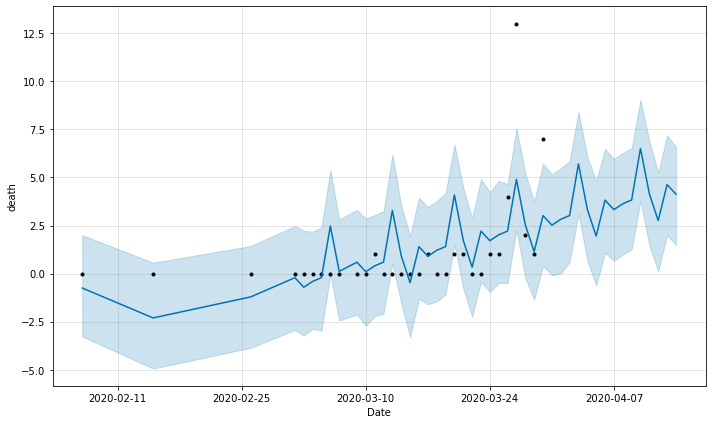

In [17]:
fig_cm = plot_plotly(m, forecast_cm)
py.iplot(fig_cm) 

fig_cm = m.plot(forecast_cm,xlabel='Date',ylabel='death')

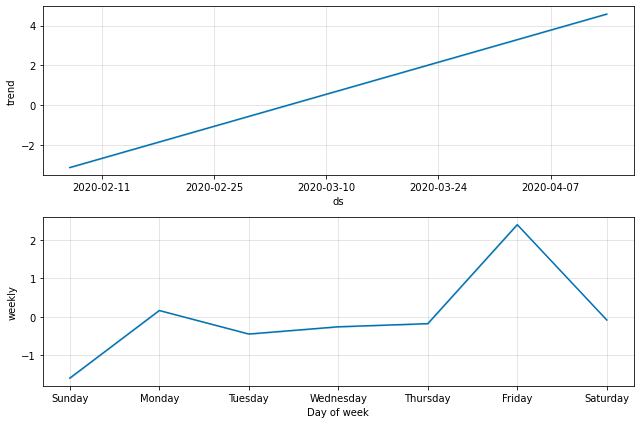

In [18]:
figure=m.plot_components(forecast_cm)

### Prédiction des rétablis

In [19]:
pr_data_r = df.loc[:,['Jour','Rétablis']]
pr_data_r.columns = ['ds','y']
pr_data_r.head()

ds  y
0 2020-02-07  0
1 2020-02-15  0
2 2020-02-26  0
3 2020-03-02  0
4 2020-03-03  0

In [20]:
m=Prophet()
m.fit(pr_data_r)
future=m.make_future_dataframe(periods=15)
forecast_r=m.predict(future)
forecast_r

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2020-02-07 -0.951645   -1.351176    0.108681    -0.951645    -0.951645   
1  2020-02-15 -0.631696   -1.317189    0.115992    -0.631696    -0.631696   
2  2020-02-26 -0.191766   -1.093219    0.383336    -0.191766    -0.191766   
3  2020-03-02  0.008202   -0.480802    0.974961     0.008202     0.008202   
4  2020-03-03  0.048196   -0.853799    0.532661     0.048196     0.048196   
5  2020-03-04  0.088189   -0.806728    0.653182     0.088189     0.088189   
6  2020-03-05  0.128183   -0.634383    0.877947     0.128183     0.128183   
7  2020-03-06  0.168176   -0.245927    1.208720     0.168176     0.168176   
8  2020-03-07  0.208170   -0.516763    0.946414     0.208170     0.208170   
9  2020-03-09  0.288157   -0.214527    1.255419     0.288157     0.288157   
10 2020-03-10  0.328151   -0.656355    0.794872     0.328151     0.328151   
11 2020-03-11  0.368145   -0.542079    0.906813     0.368145     0.368145   
12 2020-03-12  0.408138   -0.368043    1.099769     0.408138     0.408138   
13 2020-03-13  0.448132    0.083410    1.495590     0.448132     0.448132   
14 2020-03-14  0.488125   -0.230880    1.188571     0.488125     0.488125   
15 2020-03-15  0.528119   -0.373308    1.164145     0.528119     0.528119   
16 2020-03-16  0.568113    0.074064    1.517975     0.568113     0.568113   
17 2020-03-17  0.608106   -0.356187    1.093861     0.608106     0.608106   
18 2020-03-18  0.648100   -0.243831    1.201960     0.648100     0.648100   
19 2020-03-19  0.688093   -0.124528    1.372030     0.688093     0.688093   
20 2020-03-20  0.728087    0.350223    1.765749     0.728087     0.728087   
21 2020-03-21  0.768081    0.142438    1.522860     0.768081     0.768081   
22 2020-03-22  0.808074   -0.091463    1.377070     0.808074     0.808074   
23 2020-03-23  0.848068    0.306824    1.749912     0.848068     0.848068   
24 2020-03-24  0.888061   -0.064208    1.418346     0.888061     0.888061   
25 2020-03-25  0.928055    0.089393    1.480767     0.928055     0.928055   
26 2020-03-26  0.968049    0.211244    1.665453     0.968049     0.968049   
27 2020-03-27  1.008042    0.594323    2.014213     1.008042     1.008042   
28 2020-03-28  1.048036    0.342692    1.795405     1.048036     1.048036   
29 2020-03-29  1.088029    0.188317    1.696049     1.088029     1.088029   
30 2020-03-30  1.128023    0.647072    2.047942     1.128023     1.128023   
31 2020-03-31  1.168017    0.277909    1.692381     1.168017     1.168017   
32 2020-04-01  1.208010    0.308267    1.765943     1.208010     1.208010   
33 2020-04-02  1.248004    0.440562    1.912109     1.248004     1.248004   
34 2020-04-03  1.287998    0.870246    2.354578     1.287998     1.287998   
35 2020-04-04  1.327991    0.641536    2.064917     1.327991     1.327991   
36 2020-04-05  1.367985    0.517283    1.881128     1.367985     1.367985   
37 2020-04-06  1.407978    0.943480    2.354422     1.407978     1.407978   
38 2020-04-07  1.447972    0.446766    1.988891     1.447972     1.447972   
39 2020-04-08  1.487966    0.590856    2.029942     1.487966     1.487966   
40 2020-04-09  1.527959    0.712154    2.231298     1.527959     1.527959   
41 2020-04-10  1.567953    1.131769    2.572909     1.567953     1.567953   
42 2020-04-11  1.607946    0.918913    2.417667     1.607946     1.607946   
43 2020-04-12  1.647940    0.743535    2.302961     1.647940     1.647940   
44 2020-04-13  1.687934    1.220019    2.618048     1.687934     1.687934   
45 2020-04-14  1.727927    0.834266    2.244745     1.727927     1.727927   

    additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0         0.319843              0.319843              0.319843  0.319843   
1         0.023873              0.023873              0.023873  0.023873   
2        -0.168117             -0.168117             -0.168117 -0.168117   
3         0.231890              0.231890              0.231890  0.231890   
4        -0

In [21]:
rec = forecast_r.loc[:,['ds','trend']]
rec = rec[rec['trend']>0]
rec=rec.tail(15)
rec.columns = ['Date','Recovery']
rec.head()

Date  Recovery
31 2020-03-31  1.168017
32 2020-04-01  1.208010
33 2020-04-02  1.248004
34 2020-04-03  1.287998
35 2020-04-04  1.327991

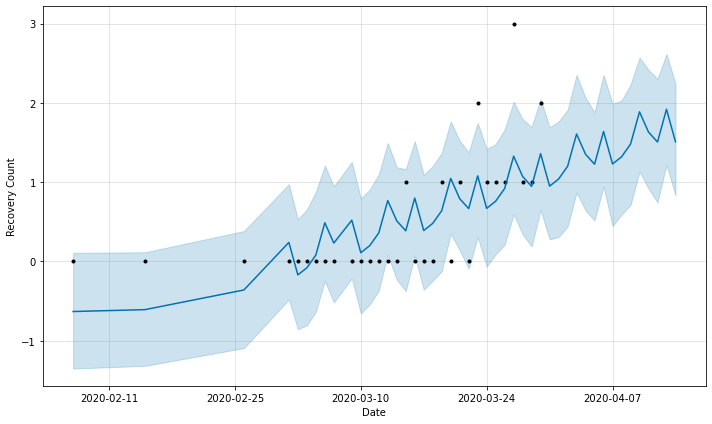

In [22]:
fig_r = plot_plotly(m, forecast_r)
py.iplot(fig_r) 

fig_r = m.plot(forecast_r,xlabel='Date',ylabel='Recovery Count')

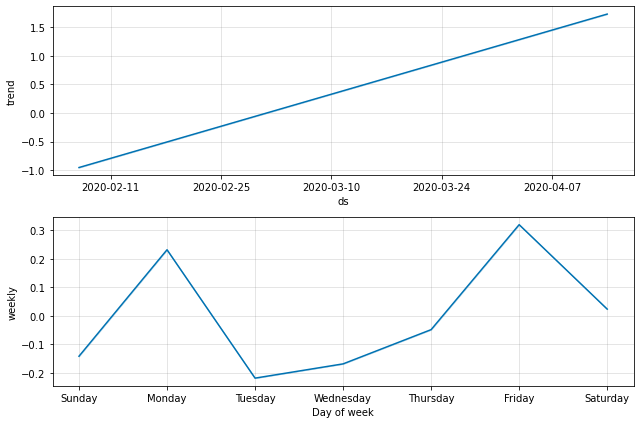

In [23]:
figure=m.plot_components(forecast_r)

In [24]:
df1=df[['Cas testés positifs']]
x = np.arange(len(df1)).reshape(-1, 1)
y = df1.values

In [25]:
pr_data = df.loc[:,['Jour','Cumul Patients']]
pr_data.columns = ['ds','y']
pr_data.head()

ds  y
0 2020-02-07  0
1 2020-02-15  0
2 2020-02-26  0
3 2020-03-02  1
4 2020-03-03  1

In [26]:
m=Prophet()
m.fit(pr_data)
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2020-02-07  -208.906461  -299.029420   -38.158862  -208.906461   
1   2020-02-15  -138.814968  -246.034476    15.451065  -138.814968   
2   2020-02-26   -42.439165  -195.318084    72.735575   -42.439165   
3   2020-03-02     1.368019  -110.188751   160.586778     1.368019   
4   2020-03-03    10.129456  -164.440473    87.017439    10.129456   
..         ...          ...          ...          ...          ...   
391 2021-03-26  3409.567328  3305.856547  3569.216105  3409.566525   
392 2021-03-27  3418.328766  3310.286044  3567.921699  3418.327959   
393 2021-03-28  3427.090204  3334.470341  3594.599771  3427.089393   
394 2021-03-29  3435.851641  3328.839734  3592.371818  3435.850828   
395 2021-03-30  3444.613079  3261.649409  3519.975100  3444.612262   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    -208.906461       27.262238             27.262238             27.262238   
1    -138.814968       21.634973             21.634973             21.634973   
2     -42.439165      -23.012071            -23.012071            -23.012071   
3       1.368019       23.780214             23.780214             23.780214   
4      10.129456      -47.612896            -47.612896            -47.612896   
..           ...             ...                   ...                   ...   
391  3409.568167       27.262238             27.262238             27.262238   
392  3418.329609       21.634973             21.634973             21.634973   
393  3427.091051       31.083487             31.083487             31.083487   
394  3435.852493       23.780214             23.780214             23.780214   
395  3444.613933      -47.612896            -47.612896            -47.612896   

        weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0    27.262238     27.262238     27.262238                   0.0   
1    21.634973     21.634973     21.634973                   0.0   
2   -23.012071    -23.012071    -23.012071                   0.0   
3    23.780214     23.780214     23.780214                   0.0   
4   -47.612896    -47.612896    -47.612896                   0.0   
..         ...           ...           ...                   ...   
391  27.262238     27.262238     27.262238                   0.0   
392  21.634973     21.634973     21.634973                   0.0   
393  31.083487     31.083487     31.083487                   0.0   
394  23.780214     23.780214     23.780214                   0.0   
395 -47.612896    -47.612896    -47.612896                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                           0.0                         0.0  -181.644223  
1                           0.0                         0.0  -117.179995  
2                           0.0                         0.0   -65.451236  
3                           0.0                         0.0    25.148233  
4                           0.0                         0.0   -37.483440  
..                          ...                         ...          ...  
391                         0.0                         0.0  3436.829566  
392                         0.0                         0.0  3439.963739  
393                         0.0                         0.0  3458.173690  
394                         0.0                         0.0  3459.631856  
395                         0.0                         0.0  3397.000184  

[396 rows x 16 columns]

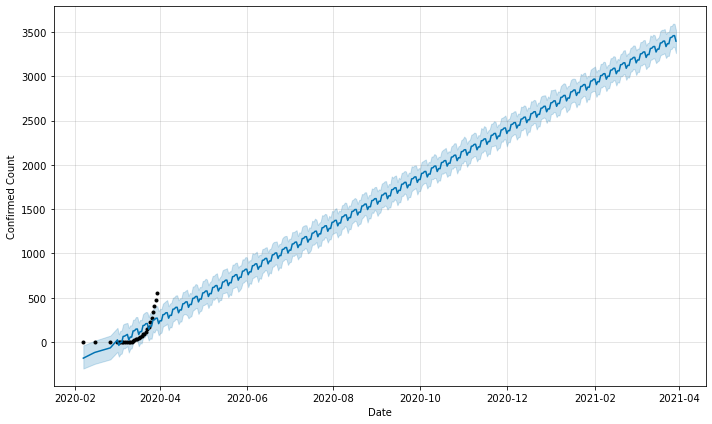

In [27]:
fig = plot_plotly(m, forecast)
py.iplot(fig) 

fig = m.plot(forecast,xlabel='Date',ylabel='Confirmed Count')

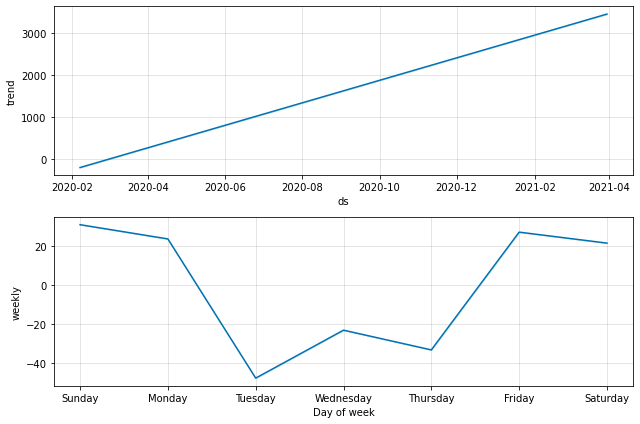

In [28]:
figure=m.plot_components(forecast)

In [29]:
arima_data=pr_data

arima_data.columns = ['confirmed_date','count']
arima_data=arima_data[:]
arima_data

confirmed_date  count
0      2020-02-07      0
1      2020-02-15      0
2      2020-02-26      0
3      2020-03-02      1
4      2020-03-03      1
5      2020-03-04      1
6      2020-03-05      2
7      2020-03-06      2
8      2020-03-07      2
9      2020-03-09      2
10     2020-03-10      3
11     2020-03-11      6
12     2020-03-12      6
13     2020-03-13      8
14     2020-03-14     18
15     2020-03-15     29
16     2020-03-16     37
17     2020-03-17     44
18     2020-03-18     54
19     2020-03-19     63
20     2020-03-20     86
21     2020-03-21     96
22     2020-03-22    115
23     2020-03-23    143
24     2020-03-24    170
25     2020-03-25    225
26     2020-03-26    275
27     2020-03-27    345
28     2020-03-28    402
29     2020-03-29    479
30     2020-03-30    556

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
model = ARIMA(arima_data['count'].values, order=(0, 2,4))
fit_model = model.fit(trend='c', full_output=True, disp=True)
fit_model.summary()

C:\Users\MYC\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\MYC\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\MYC\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

C:\Users\MYC\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

C:\Users\MYC\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning:

invalid value encountered in less_equal



<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                   29
Model:                 ARIMA(0, 2, 4)   Log Likelihood                 -95.609
Method:                       css-mle   S.D. of innovations              5.576
Date:                Tue, 31 Mar 2020   AIC                            203.217
Time:                        15:08:54   BIC                            211.421
Sample:                             2   HQIC                           205.787
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5120      1.483      1.694      0.090      -0.394       5.418
ma.L1.D2.y    -0.8384        nan        nan        nan         nan         nan
ma.L2.D2.y     1.1977        nan        nan        nan         nan         nan
ma.L3.D2.y    -0.8384        nan        nan        nan         nan         nan
ma.L4.D2.y     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.2849           -0.9586j            1.0000           -0.2960
MA.2           -0.2849           +0.9586j            1.0000            0.2960
MA.3            0.7041           -0.7101j            1.0000           -0.1257
MA.4            0.7041           +0.7101j            1.0000            0.1257
-----------------------------------------------------------------------------
"""

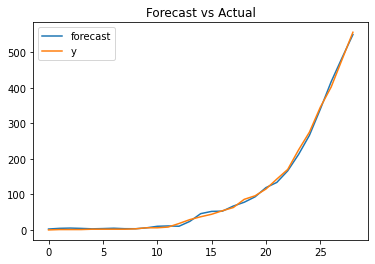

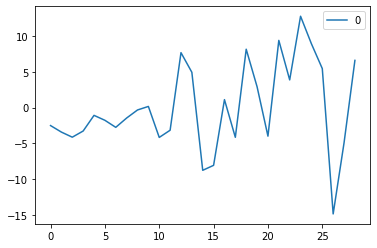

In [32]:
fit_model.plot_predict()
plt.title('Forecast vs Actual')
pd.DataFrame(fit_model.resid).plot()

In [33]:
forcast = fit_model.forecast(steps=7)
pred_y = forcast[0].tolist()
pd.DataFrame(pred_y)

0
0   641.979765
1   727.653330
2   805.367129
3   892.194288
4   981.533433
5  1073.384562
6  1167.747677

In [34]:
dataset = arima_data
dataset.set_index("confirmed_date", inplace = True)
dataset.head()


count
confirmed_date       
2020-02-07          0
2020-02-15          0
2020-02-26          0
2020-03-02          1
2020-03-03          1

In [35]:
data = np.array(dataset).reshape(-1, 1)
train_data = dataset[5:len(dataset)-5]
test_data = dataset[len(dataset)-5:]

In [36]:
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
#from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.
C:\Users\MYC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Users\MYC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Users\MYC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Users\MYC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:496: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,

In [44]:
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)
n_input =5
n_features =1
                             
generator = TimeseriesGenerator(scaled_train_data,scaled_train_data, length=n_input, batch_size=1)

lstm_model = Sequential()
lstm_model.add(LSTM(units = 50, return_sequences = True, input_shape = (n_input, n_features)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units = 1))
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
lstm_model.fit_generator( generator,epochs = 30)

Epoch 1/30
16/16 [==============================] - 6s 379ms/step - loss: 0.1401
Epoch 2/30
16/16 [==============================] - 0s 18ms/step - loss: 0.0730
Epoch 3/30
16/16 [==============================] - 0s 19ms/step - loss: 0.0663
Epoch 4/30
16/16 [==============================] - 0s 20ms/step - loss: 0.0621
Epoch 5/30
16/16 [==============================] - ETA: 0s - loss: 0.048 - 0s 19ms/step - loss: 0.0431
Epoch 6/30
16/16 [==============================] - 0s 19ms/step - loss: 0.0109
Epoch 7/30
16/16 [==============================] - 0s 18ms/step - loss: 0.0046
Epoch 8/30
16/16 [==============================] - 0s 18ms/step - loss: 0.0032
Epoch 9/30
16/16 [==============================] - 0s 18ms/step - loss: 0.0091
Epoch 10/30
16/16 [==============================] - 0s 20ms/step - loss: 0.0027
Epoch 11/30
16/16 [==============================] - 0s 19ms/step - loss: 0.0036 ETA: 0s - loss: 0.0035 
Epoch 12/30
16/16 [==============================] - 0s 18ms/step - l

In [45]:
lstm_model.history.history.keys()

dict_keys(['loss'])

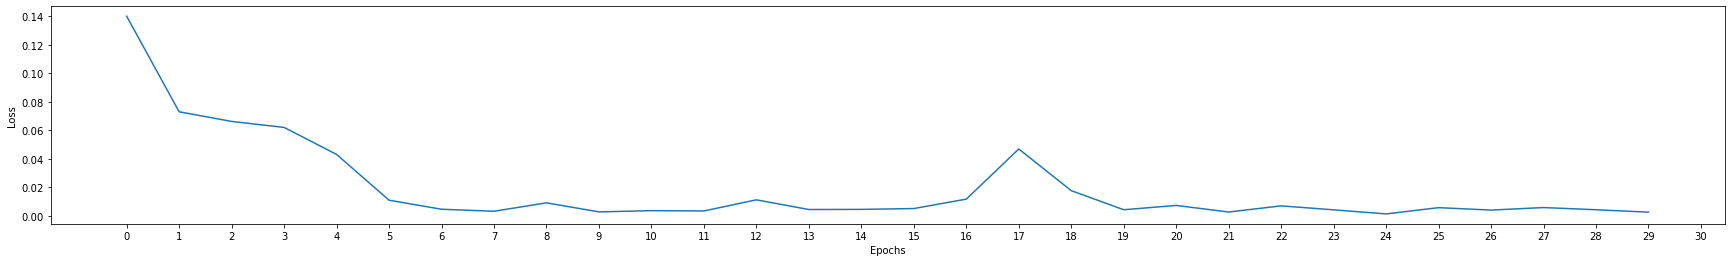

In [46]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize = (30,4))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,100,1))
plt.plot(range(len(losses_lstm)), losses_lstm)

In [47]:
lstm_predictions_scaled = []

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [48]:
prediction = pd.DataFrame(scaler.inverse_transform(lstm_predictions_scaled))
prediction

0
0  247.182697
1  301.829502
2  364.602821
3  428.321316
4  493.388039

In [49]:
times = np.arange(1,32)
df=arima_data[['count']]
var=df.to_numpy()

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

C:\Users\MYC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\MYC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



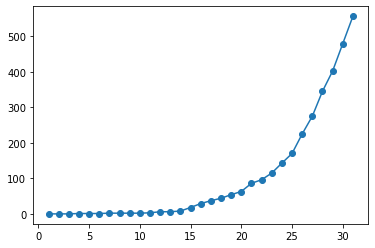

In [51]:
clf = SVR(degree=5,C=1000)
vals=clf.fit(times.reshape(-1,1),var).predict(times.reshape(-1,1))
plt.plot(times.reshape(-1,1),vals)
plt.scatter(times.reshape(-1,1),var)
plt.show()

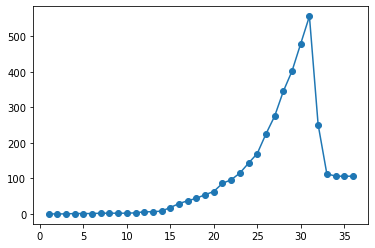

In [52]:
value = clf.predict(np.arange(1,37).reshape(-1,1))
plt.plot(np.arange(1,37),value)
plt.scatter(np.arange(1,37),value)
plt.show()
#print(f'Prediction of deaths using SVR on {int(day)} is {int(value)}')

From the given data, Looks like the death rate of the virus might reduce by 20th feb which might not be a real estimation but If we have more data points then we can predict a bit better

In [ ]:
idata.describe()

In [58]:
import seaborn as sns

In [ ]:
sns.pairplot(idata)

In [ ]:
idata['Recovered'].mean()

In [54]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
x=df.loc[:,['Cas testés']]
y=df.loc[:,['Cas testés positifs']]
x=np.array(x)
y=np.array(y)
reg = linear_model.LinearRegression(normalize='Ture')

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)


reg.fit(X_train, y_train)

print(reg.score(X_train, y_train))

0.7696838626305429


In [68]:
reg.coef_

array([[0.16611057]])

In [69]:
reg.intercept_

array([3.96449102])

ValueError: Input passed into argument "'y1'"is not 1-dimensional.

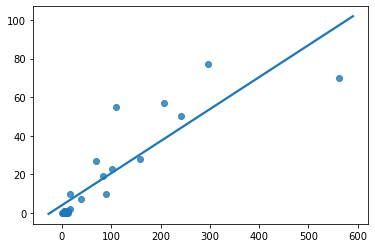

In [67]:
sns.regplot(x=X_train,y=y_train)
